# **Logistic Regression**

## **Logistic Regression**
Is a binary classifier que utiliza la funcion sigmoidal para calcular la probabilidad d ela clase positiva.Para el entrenamiento minimiza la funcion de coste **Log Loss** que es convexa. 


$$log\_loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i * log(y\_pred\_i) + (1-y_i) * log(1 - y\_pred\_i)]$$

Donde N es el número total de instancias en el conjunto de entrenamiento, y_i es la clase verdadera de la i-ésima instancia (0 o 1), y_pred_i es la probabilidad predicha por el modelo de que la i-ésima instancia pertenezca a la clase positiva (un número entre 0 y 1), y log es la función logarítmica natural.


In [5]:
from sklearn import datasets
import numpy as np 
iris = datasets.load_iris()
list(iris.keys())   # ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int0) # 1 if Iris virginica, else 0

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal
widths varying from 0 cm to 3 cm

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

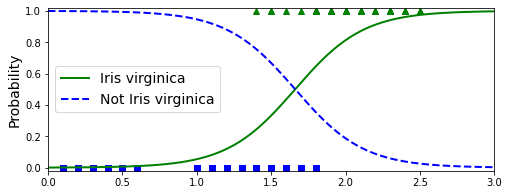

In [27]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
# plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
# plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")


# + more Matplotlib code to make the image look pretty
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

**Decision Bondaries(Limite)**: en torno a 1,6 cm en el que ambas probabilidades son
similares al 50%: si la anchura del pétalo es superior a 1,6 cm, el clasificador
predecirá que la flor es una Iris virginica, y en caso contrario predecirá que
no lo es (aunque no esté muy seguro)

## **Softmax Regression**
The Logistic Regression model can be generalized to support multiple
classes directly, without having to train and combine multiple binary
classifiers (as discussed in Chapter 3). This is called **Softmax Regression**, or
Multinomial Logistic Regression

In [38]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
# 1/C es el termino usado para la regularizacion en este caso l_2 (default)
# solver es el algoritmo de optimizacio a usar  

softmax_reg.fit(X, y)
print(softmax_reg.predict_proba([[5, 2]]))
softmax_reg.predict([[5,2]])


[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


array([2])

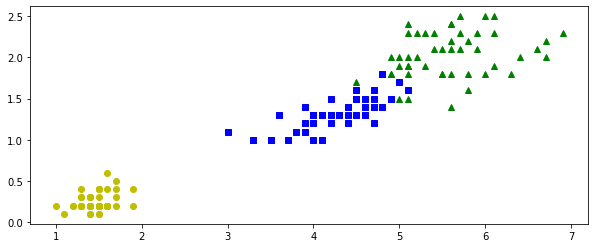

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

In [84]:
# meshgrid() es para mezclar cada elemento del primer parametro con las del segundo
# parametro y devuelve un arreglo por cada dimension listo apra concatener 
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
np.c_[x0.ravel(), x1.ravel()].shape


(100000, 2)